### Определение собственных чисел краевой задачи Штурма-Лиувилля

Рассмотрим краевую задачу:

$\psi''(x) + x\psi(x) = -\lambda \psi(x), \quad x \in (0, 1)$.

$\psi(0) = 0, \quad \psi'(1) + \psi(1) = 0$.

Решение задачи в первом приближении разыскивается в виде следующего ряда:

$\psi(x)=C_0+C_1 x+C_{2} x^2+\dots +C_n x^n=\sum\limits_{i}^{n}C_{i}x^{i}=0$.

Найдем производные:

$\psi'''(x) + \psi'(x)\,x + \psi(x) = -\lambda \psi'(x)$,

$\psi^{(4)}(x) + \psi''(x)\,x + 2\psi'(x) = -\lambda \psi''(x)$,

$\psi^{(n)}(x) + \psi^{(n-2)}(x)\,x + (n-2)\psi^{(n-3)}(x) = -\lambda \psi^{(n-2)}(x)$,

$\boldsymbol{\psi^{(n)}(x) = -(n - 2)\psi^{(n - 3)}(x) - (\lambda + x)\psi^{(n - 2)}(x)}, \quad n \geq 3$.

Получим неоднородные условия:

Пусть $\psi(1) = 1 \Rightarrow \psi'(1) = -1$. тогда при $\boldsymbol{x=1}$:

$\psi''(1) + \psi(1) = -\lambda \psi(1)$

$\psi''(1) = -\lambda \psi(1) - \psi(1) = -\lambda - 1$

$\psi'''(1) = -\lambda \psi'(1) - \psi'(1) - \psi(1) = \lambda$

$\boldsymbol{\psi^{(n)}(1) = -(n - 2)\psi^{(n - 3)}(1) - (\lambda + 1)\psi^{(n - 2)}(1)}, \quad n \geq 3$


In [1]:
#from scipy import integrate # только определнные интегралы
import math
import numpy as np

from matplotlib import cm
import matplotlib.pyplot as plt

import sympy as sp
from scipy import linalg

Matplotlib is building the font cache; this may take a moment.


In [2]:
N=16   #  степень многочлена  (четная)

from sympy import symbols 
C=symbols('C:17')  #   постоянных до N+1


f = sp.Function("f") 
x = sp.Symbol("x")  # переменая x
lmb = sp.Symbol("lmb")  # переменая x

Определение функции 

$\psi(x)=C_0+C_1 x+C_{2} x^2+\dots +C_n x^n$.

Постоянные $C_i$ и переменная $x$ введены как тип Symbol

Число условий : $n$ при $x=1$ $+$ одно условие при $x=0$.


In [3]:
def f(x):
    var=0
    for k in range(0,N+1):
        var+=(1.)*C[k]*x**(k)   #/math.factorial(k)
    return var
    

In [4]:
f(x)

1.0*C0 + 1.0*C1*x + 1.0*C10*x**10 + 1.0*C11*x**11 + 1.0*C12*x**12 + 1.0*C13*x**13 + 1.0*C14*x**14 + 1.0*C15*x**15 + 1.0*C16*x**16 + 1.0*C2*x**2 + 1.0*C3*x**3 + 1.0*C4*x**4 + 1.0*C5*x**5 + 1.0*C6*x**6 + 1.0*C7*x**7 + 1.0*C8*x**8 + 1.0*C9*x**9

Краевые условия записываются в массив переменной длины s.
Правая часть - массив b

In [6]:
s=[]
# Неоднородное Краевое условие 
s.append(f(x).evalf(subs={x:0}))


#  Считаем условия с lambda
for k in range(1,N+1):    
    df=lambda x : sp.diff(f(x),x, k)
    print(df(x))
    s.append(df(x).evalf(subs={x: 1}))


# Правые части
b = []
b.append(0)
b.append(-1)
b.append(-1-lmb)
b.append(lmb)
for k in range(4,N+1):
    b.append(sp.simplify(-(k-2)*b[k-3] - (lmb+1)*b[k-2]))

1.0*C1 + 10.0*C10*x**9 + 11.0*C11*x**10 + 12.0*C12*x**11 + 13.0*C13*x**12 + 14.0*C14*x**13 + 15.0*C15*x**14 + 16.0*C16*x**15 + 2.0*C2*x + 3.0*C3*x**2 + 4.0*C4*x**3 + 5.0*C5*x**4 + 6.0*C6*x**5 + 7.0*C7*x**6 + 8.0*C8*x**7 + 9.0*C9*x**8
90.0*C10*x**8 + 110.0*C11*x**9 + 132.0*C12*x**10 + 156.0*C13*x**11 + 182.0*C14*x**12 + 210.0*C15*x**13 + 240.0*C16*x**14 + 2.0*C2 + 6.0*C3*x + 12.0*C4*x**2 + 20.0*C5*x**3 + 30.0*C6*x**4 + 42.0*C7*x**5 + 56.0*C8*x**6 + 72.0*C9*x**7
720.0*C10*x**7 + 990.0*C11*x**8 + 1320.0*C12*x**9 + 1716.0*C13*x**10 + 2184.0*C14*x**11 + 2730.0*C15*x**12 + 3360.0*C16*x**13 + 6.0*C3 + 24.0*C4*x + 60.0*C5*x**2 + 120.0*C6*x**3 + 210.0*C7*x**4 + 336.0*C8*x**5 + 504.0*C9*x**6
5040.0*C10*x**6 + 7920.0*C11*x**7 + 11880.0*C12*x**8 + 17160.0*C13*x**9 + 24024.0*C14*x**10 + 32760.0*C15*x**11 + 43680.0*C16*x**12 + 24.0*C4 + 120.0*C5*x + 360.0*C6*x**2 + 840.0*C7*x**3 + 1680.0*C8*x**4 + 3024.0*C9*x**5
30240.0*C10*x**5 + 55440.0*C11*x**6 + 95040.0*C12*x**7 + 154440.0*C13*x**8 + 240240.0*C1

In [7]:
s # смотрим s

[1.0*C0,
 1.0*C1 + 10.0*C10 + 11.0*C11 + 12.0*C12 + 13.0*C13 + 14.0*C14 + 15.0*C15 + 16.0*C16 + 2.0*C2 + 3.0*C3 + 4.0*C4 + 5.0*C5 + 6.0*C6 + 7.0*C7 + 8.0*C8 + 9.0*C9,
 90.0*C10 + 110.0*C11 + 132.0*C12 + 156.0*C13 + 182.0*C14 + 210.0*C15 + 240.0*C16 + 2.0*C2 + 6.0*C3 + 12.0*C4 + 20.0*C5 + 30.0*C6 + 42.0*C7 + 56.0*C8 + 72.0*C9,
 720.0*C10 + 990.0*C11 + 1320.0*C12 + 1716.0*C13 + 2184.0*C14 + 2730.0*C15 + 3360.0*C16 + 6.0*C3 + 24.0*C4 + 60.0*C5 + 120.0*C6 + 210.0*C7 + 336.0*C8 + 504.0*C9,
 5040.0*C10 + 7920.0*C11 + 11880.0*C12 + 17160.0*C13 + 24024.0*C14 + 32760.0*C15 + 43680.0*C16 + 24.0*C4 + 120.0*C5 + 360.0*C6 + 840.0*C7 + 1680.0*C8 + 3024.0*C9,
 30240.0*C10 + 55440.0*C11 + 95040.0*C12 + 154440.0*C13 + 240240.0*C14 + 360360.0*C15 + 524160.0*C16 + 120.0*C5 + 720.0*C6 + 2520.0*C7 + 6720.0*C8 + 15120.0*C9,
 151200.0*C10 + 332640.0*C11 + 665280.0*C12 + 1235520.0*C13 + 2162160.0*C14 + 3603600.0*C15 + 5765760.0*C16 + 720.0*C6 + 5040.0*C7 + 20160.0*C8 + 60480.0*C9,
 604800.0*C10 + 1663200.0*C1

Составляем систему  уравнений для нахождения постоянных $C_{i}$, записав их в переменную equations
и решаем с помощью solve. Ответ запиываем в переменную res. 

Результатом решения системы уравнений будет словарь, где ключами будут $C_{i}$, а значениями - решения. 

In [8]:
equations = [sp.Eq(s[k],b[k]) for k in range(len(b))]

In [9]:
equations # смотрим уравнения

[Eq(1.0*C0, 0),
 Eq(1.0*C1 + 10.0*C10 + 11.0*C11 + 12.0*C12 + 13.0*C13 + 14.0*C14 + 15.0*C15 + 16.0*C16 + 2.0*C2 + 3.0*C3 + 4.0*C4 + 5.0*C5 + 6.0*C6 + 7.0*C7 + 8.0*C8 + 9.0*C9, -1),
 Eq(90.0*C10 + 110.0*C11 + 132.0*C12 + 156.0*C13 + 182.0*C14 + 210.0*C15 + 240.0*C16 + 2.0*C2 + 6.0*C3 + 12.0*C4 + 20.0*C5 + 30.0*C6 + 42.0*C7 + 56.0*C8 + 72.0*C9, -lmb - 1),
 Eq(720.0*C10 + 990.0*C11 + 1320.0*C12 + 1716.0*C13 + 2184.0*C14 + 2730.0*C15 + 3360.0*C16 + 6.0*C3 + 24.0*C4 + 60.0*C5 + 120.0*C6 + 210.0*C7 + 336.0*C8 + 504.0*C9, lmb),
 Eq(5040.0*C10 + 7920.0*C11 + 11880.0*C12 + 17160.0*C13 + 24024.0*C14 + 32760.0*C15 + 43680.0*C16 + 24.0*C4 + 120.0*C5 + 360.0*C6 + 840.0*C7 + 1680.0*C8 + 3024.0*C9, (lmb + 1)**2 + 2),
 Eq(30240.0*C10 + 55440.0*C11 + 95040.0*C12 + 154440.0*C13 + 240240.0*C14 + 360360.0*C15 + 524160.0*C16 + 120.0*C5 + 720.0*C6 + 2520.0*C7 + 6720.0*C8 + 15120.0*C9, -lmb**2 + 2*lmb + 3),
 Eq(151200.0*C10 + 332640.0*C11 + 665280.0*C12 + 1235520.0*C13 + 2162160.0*C14 + 3603600.0*C15 + 5765

In [10]:
res=sp.solve(equations,C)   # функция solve решает систему уравнений

In [11]:
res #  получили словарь  res[C[1]]  # элемент словаря

{C0: 0.0,
 C1: -7.64716373181982e-13*lmb**8 + 1.6594345298049e-10*lmb**7 - 2.6561658506103e-8*lmb**6 + 2.9511223087612e-6*lmb**5 - 0.000215794043919044*lmb**4 + 0.00928830523578788*lmb**3 - 0.194347660730473*lmb**2 + 1.30616645114283*lmb - 0.371458172469891,
 C10: 3.82740544777582e-10*lmb**8 - 1.07167352537723e-8*lmb**7 + 2.31940770135215e-7*lmb**6 - 1.45594503233392e-6*lmb**5 + 8.06051587301587e-6*lmb**4 - 2.0883855085244e-5*lmb**3 + 4.34647817460317e-5*lmb**2 - 3.09882054673721e-5*lmb + 9.02157738095238e-6,
 C11: -2.08767569878681e-10*lmb**8 + 3.54904868793758e-9*lmb**7 - 6.97283683394794e-8*lmb**6 + 3.68892295975629e-7*lmb**5 - 1.49060044893378e-6*lmb**4 + 6.69705487413821e-6*lmb**3 - 2.75948973865641e-6*lmb**2 + 1.24427559323393e-5*lmb - 5.76824795574796e-7,
 C12: 8.69864874494504e-11*lmb**8 - 6.95891899595603e-10*lmb**7 + 1.87890812890813e-8*lmb**6 - 7.93316765538988e-8*lmb**5 + 2.06157975255197e-7*lmb**4 - 1.65135147774037e-6*lmb**3 + 2.25468975468975e-7*lmb**2 - 1.32776174442841

Составляем функцию 

$\psi(\lambda,x)=C_{0}(\lambda)+C_{1}(\lambda)x^2+C_{3}(\lambda)x^3+\dots$

In [12]:
psi=lambda x: f(x).evalf(subs={C[k]: res[C[k]] for k in range(N+1)})   

In [13]:
psi(x) # смотрим функцию psi

1.0*x**16*(4.77947733238739e-14*lmb**8 + 3.82358186590991e-13*lmb**7 + 4.0147609592054e-12*lmb**6 - 3.21180876736432e-11*lmb**5 - 2.10774950358284e-10*lmb**4 - 8.27040757596313e-10*lmb**3 - 4.93815597982265e-10*lmb**2 + 8.32776130395178e-10*lmb + 1.26335924326996e-9) + 1.0*x**15*(-7.64716373181982e-13*lmb**8 - 5.35301461227387e-12*lmb**7 - 9.63542630209297e-11*lmb**6 + 3.05121832899611e-10*lmb**5 + 2.24826613715503e-9*lmb**4 + 1.37947186558298e-8*lmb**3 + 1.47422022422022e-8*lmb**2 + 1.65866981343172e-9*lmb - 1.33450654283988e-8) + 1.0*x**14*(5.73537279886486e-12*lmb**8 + 2.29414911954594e-11*lmb**7 + 8.83247411025189e-10*lmb**6 - 1.44531394531395e-9*lmb**5 - 4.81771315104648e-9*lmb**4 - 8.72006080339414e-8*lmb**3 - 9.94857765691099e-8*lmb**2 - 8.55488206678683e-8*lmb + 4.16560126381555e-8) + 1.0*x**13*(-2.67650730613694e-11*lmb**8 + 2.67650730613694e-11*lmb**7 - 4.65712271267827e-9*lmb**6 + 1.10004450282228e-8*lmb**5 - 2.40885657552324e-8*lmb**4 + 3.51130993492105e-7*lmb**3 + 1.382683

Подставляем $\psi(\lambda,x)$ в уравнение Штурма -Лиувилля 

In [14]:
liuvil= lambda x: sp.diff(psi(x),x,2)+x*psi(x)+lmb*psi(x)

In [15]:
liuvil(x)

1.14707455977297e-11*lmb**8 - 2.15650017237319e-9*lmb**7 + 2.93719911775467e-7*lmb**6 - 2.67508340425007e-5*lmb**5 + 0.00152751858481025*lmb**4 - 0.0473691248951666*lmb**3 + 0.60975005945058*lmb**2 + lmb*(1.0*x**16*(4.77947733238739e-14*lmb**8 + 3.82358186590991e-13*lmb**7 + 4.0147609592054e-12*lmb**6 - 3.21180876736432e-11*lmb**5 - 2.10774950358284e-10*lmb**4 - 8.27040757596313e-10*lmb**3 - 4.93815597982265e-10*lmb**2 + 8.32776130395178e-10*lmb + 1.26335924326996e-9) + 1.0*x**15*(-7.64716373181982e-13*lmb**8 - 5.35301461227387e-12*lmb**7 - 9.63542630209297e-11*lmb**6 + 3.05121832899611e-10*lmb**5 + 2.24826613715503e-9*lmb**4 + 1.37947186558298e-8*lmb**3 + 1.47422022422022e-8*lmb**2 + 1.65866981343172e-9*lmb - 1.33450654283988e-8) + 1.0*x**14*(5.73537279886486e-12*lmb**8 + 2.29414911954594e-11*lmb**7 + 8.83247411025189e-10*lmb**6 - 1.44531394531395e-9*lmb**5 - 4.81771315104648e-9*lmb**4 - 8.72006080339414e-8*lmb**3 - 9.94857765691099e-8*lmb**2 - 8.55488206678683e-8*lmb + 4.165601263815

Для определения собственного числа составляем ортогональную относительно функции $\psi$ невязку:

$result(\lambda)=\int\limits_{0}^{1}(\psi^{\prime\prime}(x)+x\psi(x)+\lambda \psi(x))\psi(x)\,dx$.

Решая алгебраическое уравнение 

$result(\lambda)= 0$,

найдем все значения  $\lambda$. 


In [16]:
result= sp.integrate(liuvil(x)*psi(x), (x, 0, 1))  

In [17]:
result   # смотрим  уравнение

2.08481687710268e-27*lmb**17 - 1.04514839012358e-24*lmb**16 + 3.24203662438422e-22*lmb**15 - 7.39435981434782e-20*lmb**14 + 1.31672540818796e-17*lmb**13 - 1.88619634284566e-15*lmb**12 + 2.20537417821699e-13*lmb**11 - 2.10242663507857e-11*lmb**10 + 1.60967146877639e-9*lmb**9 - 9.65277245382551e-8*lmb**8 + 4.38233238948821e-6*lmb**7 - 0.000143828319995065*lmb**6 + 0.00319515291503016*lmb**5 - 0.0433623926050571*lmb**4 + 0.29768558229204*lmb**3 - 0.610883079619488*lmb**2 - 0.123539982103559*lmb + 0.273328940953284

In [18]:
sob=sp.solve(sp.Eq(result,0),lmb)  # решем уравнение и получаем список решений

In [19]:
sob

[-0.655118990860074,
 0.665837788571079,
 3.45018933257597,
 22.0727965721143,
 23.6044967538225,
 -1.72112341425105 - 129.46294724666*I,
 -1.72112341425105 + 129.46294724666*I,
 3.7576225539262 - 134.686441102452*I,
 3.7576225539262 + 134.686441102452*I,
 52.4582067846256 - 61.0724689101136*I,
 52.4582067846256 + 61.0724689101136*I,
 53.9905735940555 - 13.5157350267011*I,
 53.9905735940555 + 13.5157350267011*I,
 58.1567287699796 - 63.1057518883847*I,
 58.1567287699796 + 63.1057518883847*I,
 59.4460114247604 - 13.4769040897949*I,
 59.4460114247604 + 13.4769040897949*I]

In [26]:
# точные значения собственных чисел
l = 4
p1 = lambda x: psi(x).evalf(subs={lmb: sob[l]})
eq= lambda x: sp.diff(p1(x),x,2)+x*p1(x)+sob[l]*p1(x)
er= sp.integrate(eq(x)**2, (x, 0, 1))  
err= er**0.5
err

0.0548640168285271

In [ ]:
построим result()

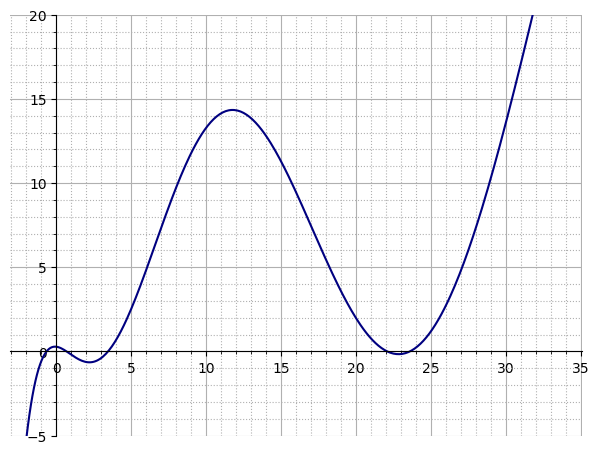

In [22]:
a=-3
b=35

h=0.1  

plt.ylim([-5, 20])
plt.xlim([a-h, b+h])

# включаем основную сетку
plt.grid(which='major')
plt.minorticks_on()
# включаем дополнительную сетку
plt.grid(which='minor', linestyle=':')
plt.tight_layout()

s_list= np.arange(a, b+h, h)
r_list=[result.evalf(subs={lmb:s_init}) for s_init in s_list]
        
plt.plot(s_list, r_list, color='#000080')
       

plt.gca().spines["left"].set_position("zero")
plt.gca().spines["bottom"].set_position("zero")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.show();

In [28]:
p0 = lambda x: psi(x).evalf(subs={lmb: sob[0]})
p2 = lambda x: psi(x).evalf(subs={lmb: sob[2]})
p4 = lambda x: psi(x).evalf(subs={lmb: sob[4]})

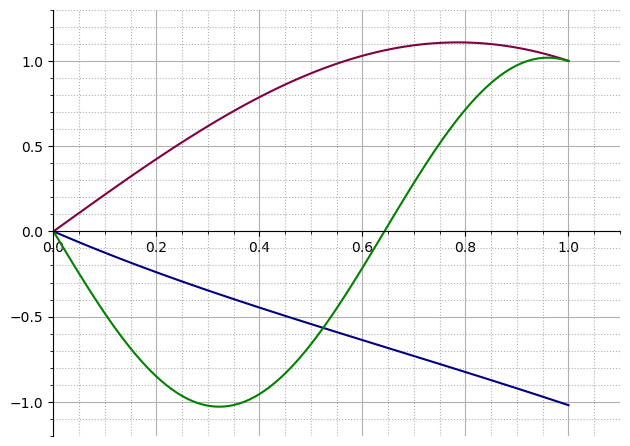

In [30]:
x_list = np.arange(0., 1.01, 0.01)
y1_list = [p0(x).evalf(subs={x:x_init}) for x_init in x_list]
y2_list = [p2(x).evalf(subs={x:x_init}) for x_init in x_list]
y3_list = [p4(x).evalf(subs={x:x_init}) for x_init in x_list]

h=0.1  

plt.ylim([-1.2, 1.2+h])
plt.xlim([0, 1+h])

# включаем основную сетку
plt.grid(which='major')
plt.minorticks_on()
# включаем дополнительную сетку
plt.grid(which='minor', linestyle=':')
plt.tight_layout()

        
plt.plot(x_list, y1_list, color='#000080')
plt.plot(x_list, y2_list, color='#800040')
plt.plot(x_list, y3_list, color='#028000')
       

plt.gca().spines["left"].set_position("zero")
plt.gca().spines["bottom"].set_position("zero")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.show();